# Import Data

In [131]:
import xlrd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector


In [132]:
wagesraw = pd.read_excel('C://Users/praky/Downloads/wage.xlsx',sheet_name='wage')
wagesraw.head()

,wage,educ,exper,tenure,nonwhite,female,numdep,smsa,west,ndurman,trade,services,profocc,servocc
0,15.500000,11,2,0,0,1,2,1,1,0,0,0,0,0
1,16.200000,12,22,2,0,1,3,1,1,0,0,1,0,1
2,15.000000,11,2,0,0,0,2,0,1,0,1,0,0,0
3,30.000000,8,44,28,0,0,0,1,1,0,0,0,0,0
4,26.500001,12,7,2,0,0,1,0,1,0,0,0,0,0


# Exploratory Analysis

In [257]:
wagesraw.isnull().sum()

wage        0
educ        0
exper       0
tenure      0
nonwhite    0
female      0
numdep      0
smsa        0
west        0
ndurman     0
trade       0
services    0
profocc     0
servocc     0
nodep       0
sqrtexp     0
sqrtten     0
logeduc     0
dtype: int64

### No Missing Data

In [134]:
wagesraw.columns.values.tolist()

['wage',
 'educ',
 'exper',
 'tenure',
 'nonwhite',
 'female',
 'numdep',
 'smsa',
 'west',
 'ndurman',
 'trade',
 'services',
 'profocc',
 'servocc']

In [135]:
desc = pd.DataFrame(wagesraw.describe())
#desc.to_csv('desc.csv')
desc.round(decimals=2)

,wage,educ,exper,tenure,nonwhite,female,numdep,smsa,west,ndurman,trade,services,profocc,servocc
count,526.00,526.00,526.00,526.00,526.0,526.00,526.00,526.00,526.00,526.00,526.00,526.0,526.00,526.00
mean,29.48,12.56,17.02,5.10,0.1,0.48,1.04,0.72,0.17,0.11,0.29,0.1,0.37,0.14
std,18.47,2.77,13.57,7.22,0.3,0.50,1.26,0.45,0.38,0.32,0.45,0.3,0.48,0.35
min,2.65,0.00,1.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
25%,16.65,12.00,5.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
50%,23.25,12.00,13.50,2.00,0.0,0.00,1.00,1.00,0.00,0.00,0.00,0.0,0.00,0.00
75%,34.40,14.00,26.00,7.00,0.0,1.00,2.00,1.00,0.00,0.00,1.00,0.0,1.00,0.00
max,124.90,18.00,51.00,44.00,1.0,1.00,6.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00


array([[<AxesSubplot:title={'center':'educ'}>]], dtype=object)

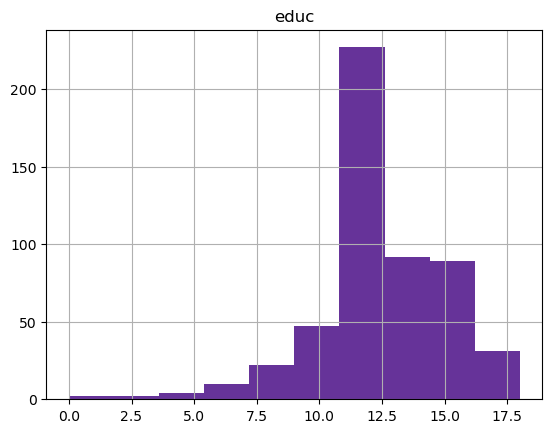

In [136]:
wagesraw.hist(column=['educ',,bins=10,color="rebeccapurple")

array([[<AxesSubplot:title={'center':'wage'}>]], dtype=object)

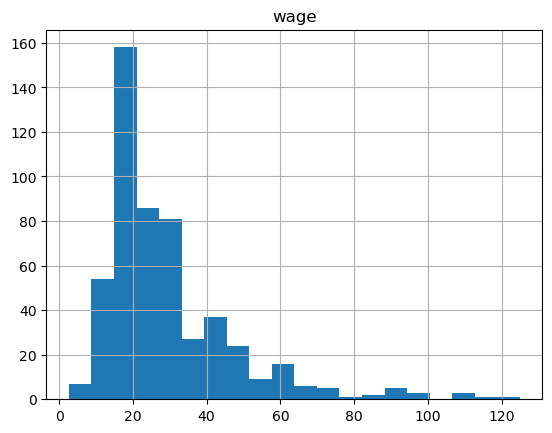

In [137]:
wagesraw.hist(column='wage',bins=20)

array([[<AxesSubplot:title={'center':'exper'}>,
        <AxesSubplot:title={'center':'sqrtexp'}>]], dtype=object)

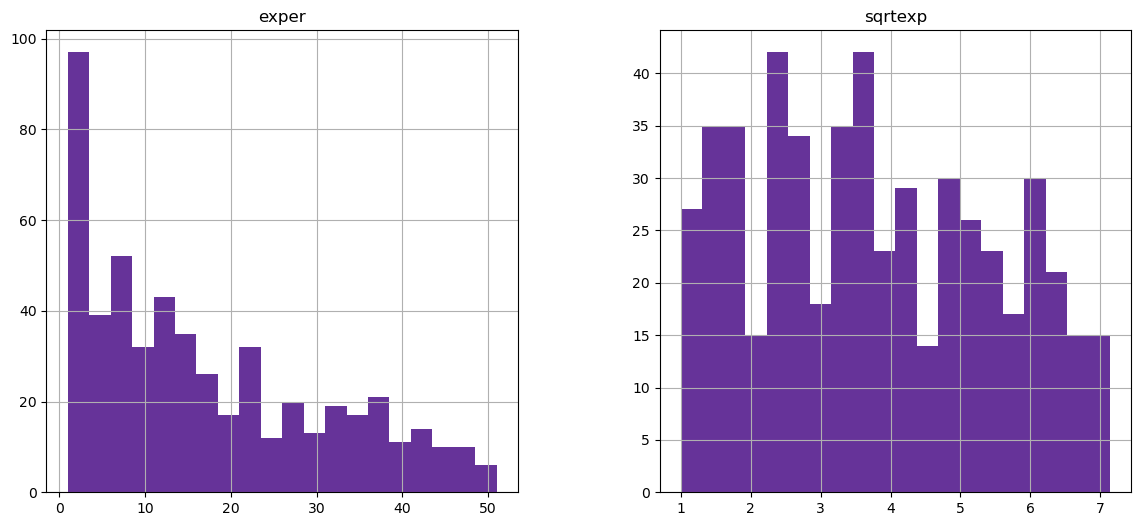

In [249]:
wagesraw.hist(column=['exper','sqrtexp'],bins=20,figsize=(14,6),color='rebeccapurple')

array([[<AxesSubplot:title={'center':'tenure'}>]], dtype=object)

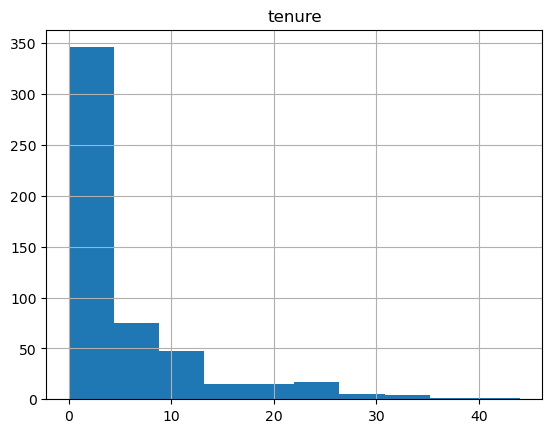

In [139]:
wagesraw.hist(column='tenure',bins=10)

### Wide StDev shows good coverage with years of education having a smaller Stdev

<AxesSubplot:title={'center':'Standard Metropolitan Statistical Area'}, ylabel='smsa'>

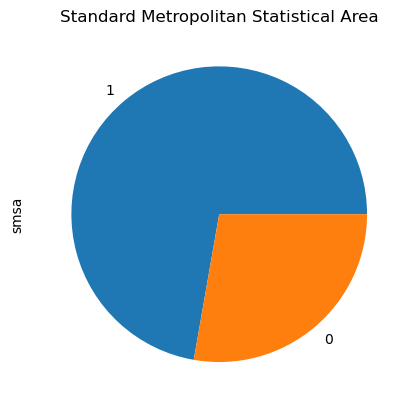

In [140]:
wagesraw['smsa'].value_counts().plot(kind='pie',title='Standard Metropolitan Statistical Area')

### Highly Skewed to Metropolitan Area [Above]

<AxesSubplot:title={'center':'isFemale?'}, ylabel='female'>

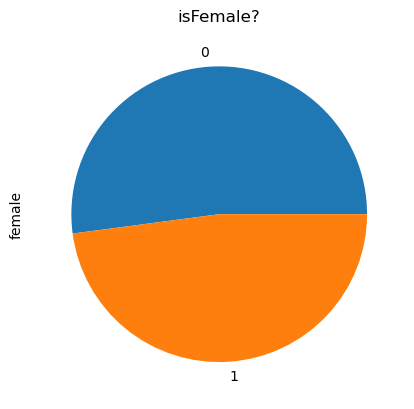

In [141]:
wagesraw['female'].value_counts().plot(kind='pie',title='isFemale?')


<AxesSubplot:title={'center':'isnotWhite?'}, ylabel='nonwhite'>

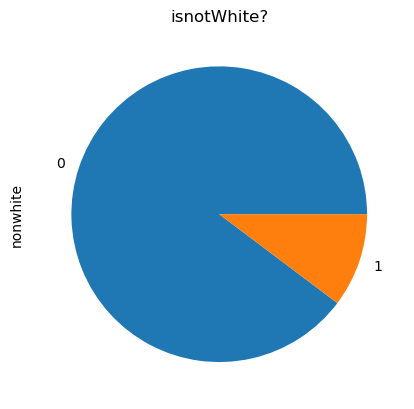

In [142]:
wagesraw['nonwhite'].value_counts().plot(kind='pie',title='isnotWhite?')


<AxesSubplot:title={'center':'WesternRegion?'}, ylabel='west'>

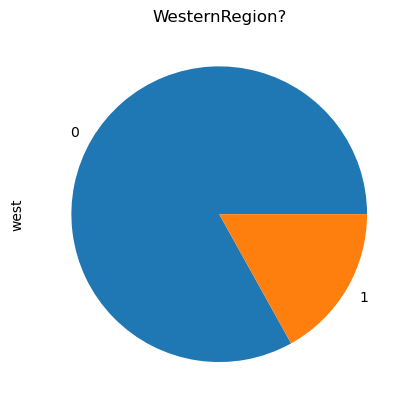

In [143]:
wagesraw['west'].value_counts().plot(kind='pie',title='WesternRegion?')


<AxesSubplot:title={'center':'IsinNonDurableManufacturing?'}, ylabel='ndurman'>

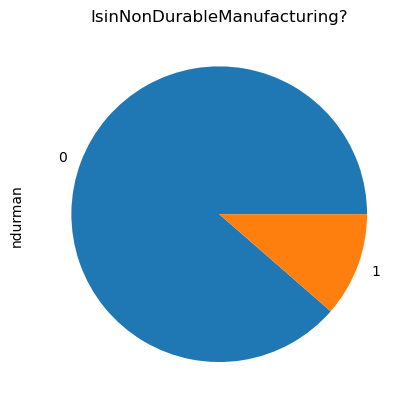

In [144]:
wagesraw['ndurman'].value_counts().plot(kind='pie',title='IsinNonDurableManufacturing?')


<AxesSubplot:title={'center':'IsinWholesale/Retail?'}, ylabel='trade'>

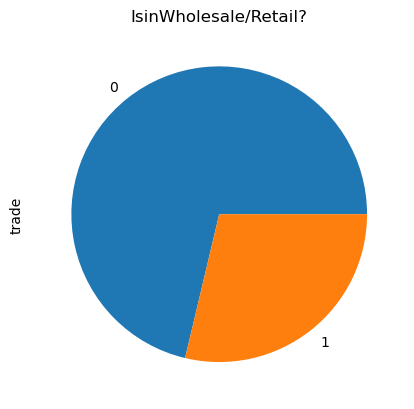

In [145]:
wagesraw['trade'].value_counts().plot(kind='pie',title='IsinWholesale/Retail?')


<AxesSubplot:title={'center':'In Services?'}, ylabel='services'>

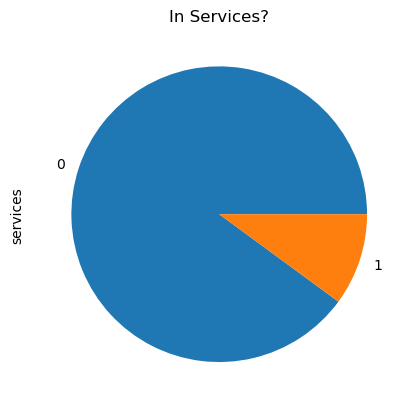

In [146]:
wagesraw['services'].value_counts().plot(kind='pie',title='In Services?')

<AxesSubplot:title={'center':'In Professional Services?'}, ylabel='profocc'>

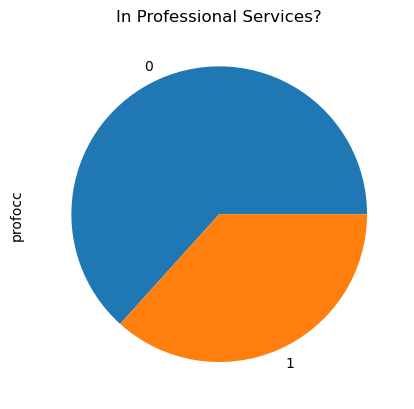

In [147]:
wagesraw['profocc'].value_counts().plot(kind='pie',title='In Professional Services?')

<AxesSubplot:title={'center':'In Services?'}, ylabel='servocc'>

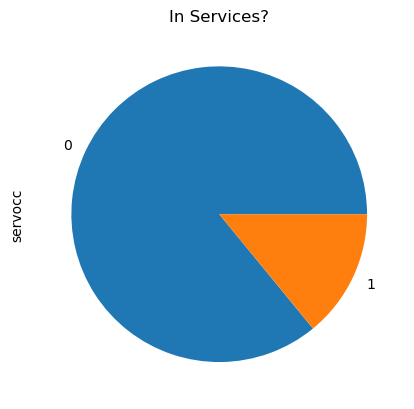

In [148]:
wagesraw['servocc'].value_counts().plot(kind='pie',title='In Services?')

<AxesSubplot:xlabel='educ', ylabel='wage'>

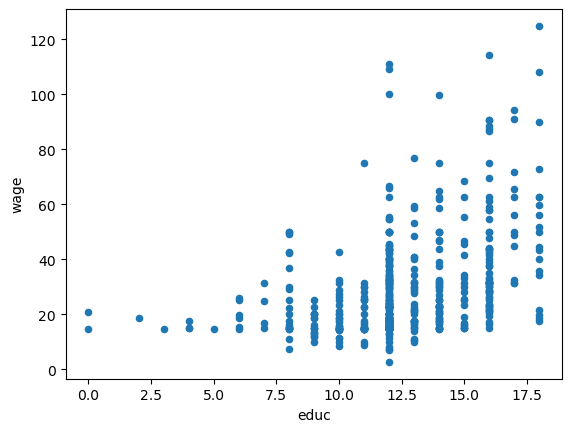

In [149]:
wagesraw.plot.scatter(x='educ', y='wage')

<AxesSubplot:xlabel='exper', ylabel='wage'>

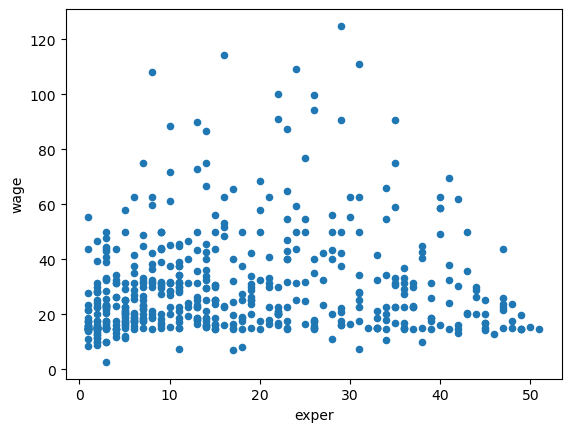

In [150]:
wagesraw.plot.scatter(x='exper', y='wage')

<AxesSubplot:xlabel='tenure', ylabel='wage'>

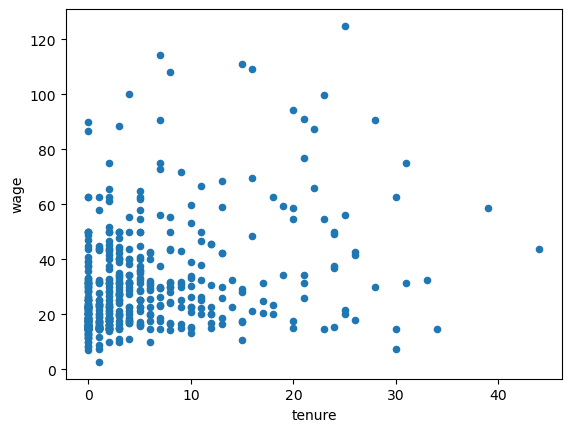

In [151]:
wagesraw.plot.scatter(x='tenure', y='wage')

In [152]:
x = wagesraw[['educ',
 'exper',
 'tenure',
 'nonwhite',
 'female',
 'numdep',
 'smsa',
 'west',
 'ndurman',
 'trade',
 'services',
 'profocc',
 'servocc']]
y = wagesraw['wage']

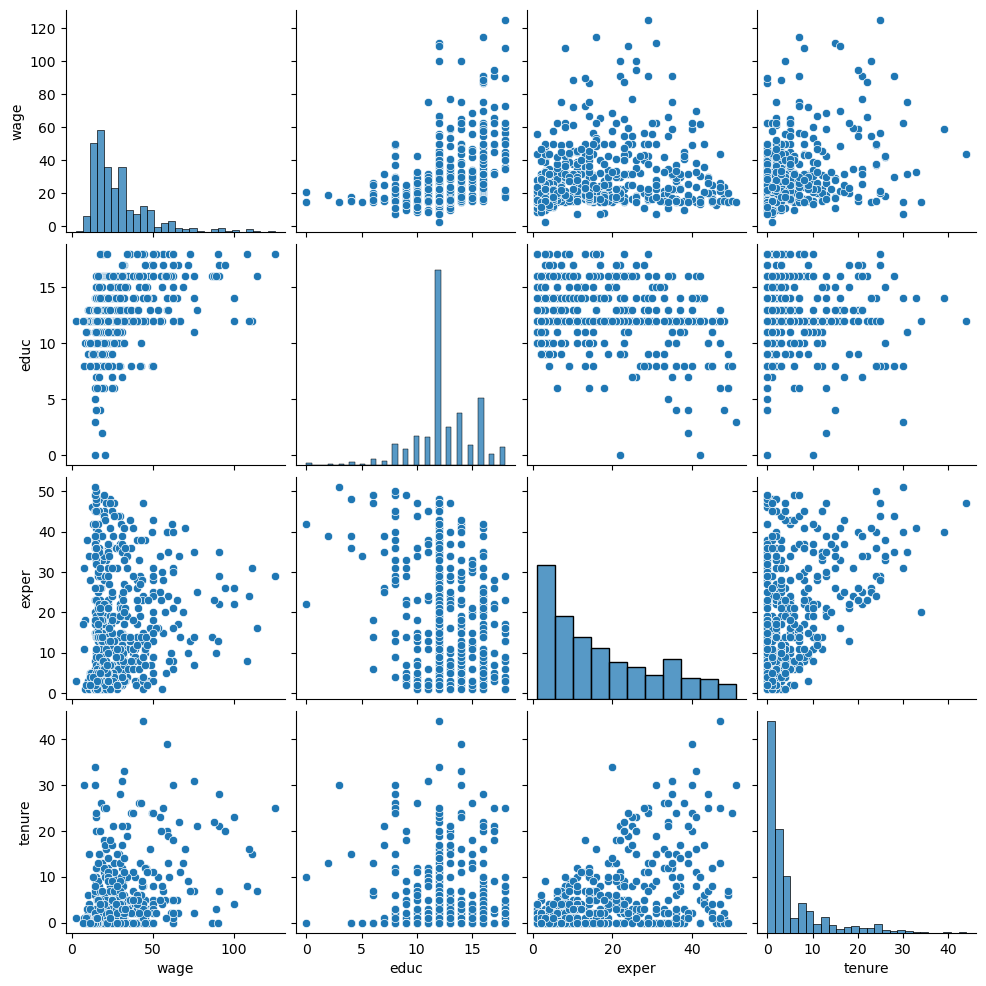

In [153]:
sns.pairplot(wagesraw[['wage','educ','exper','tenure']]);

In [185]:
wagesraw['nodep']= np.where(wagesraw['numdep'] == 0, 1, 0)
wagesraw['sqrtexp']= np.sqrt(wagesraw['exper'])

,wage,educ,exper,tenure,nonwhite,female,numdep,smsa,west,ndurman,trade,services,profocc,servocc,nodep,sqrtexp
143,29.200001,13,5,0,0,1,1,1,0,0,0,0,0,0,0,2.236068
280,31.250000,15,12,4,0,1,2,1,0,0,0,0,1,0,0,3.464102
8,18.000000,12,26,4,0,1,2,1,1,0,1,0,1,0,0,5.099020
343,20.000000,12,5,2,0,0,0,0,0,0,0,0,0,0,1,2.236068
346,16.500000,12,21,9,0,1,2,0,0,0,1,0,1,0,0,4.582576
404,40.000000,12,12,3,1,1,1,0,0,0,0,0,0,0,0,3.464102
518,37.500000,12,18,5,0,0,2,0,1,0,1,0,0,0,0,4.242641
499,36.250000,12,14,5,0,0,3,1,1,0,0,0,0,0,0,3.741657
366,20.250001,8,44,25,0,0,0,1,0,1,0,0,0,1,1,6.633250
52,25.000000,12,15,5,0,0,1,1,0,0,1,0,0,0,0,3.872983


In [234]:
wagesraw['sqrtten']= np.power(wagesraw['tenure'],1/2)
#wagesraw['sqrteduc']= np.sqrt(35-wagesraw['educ'])
wagesraw['logeduc']= np.log(30-wagesraw['educ'])
#wagesraw.rename(columns={"sqrteduc": "logeduc"})
#np.power((df1['Score']),1/3)

array([[<AxesSubplot:title={'center':'educ'}>,
        <AxesSubplot:title={'center':'logeduc'}>],
       [<AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'sqrtten'}>]], dtype=object)

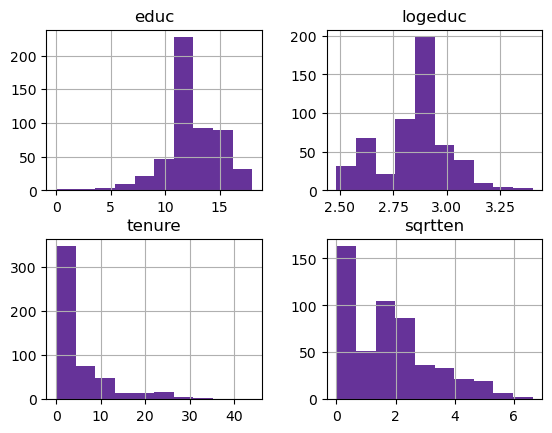

In [241]:

#wagesraw = wagesraw.drop(columns='sqrteduc')
wagesraw.sample(20)
wagesraw[['educ','logeduc','tenure','sqrtten']].hist(color='rebeccapurple')

In [154]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 100)

In [155]:
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [156]:
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  3.026651710612338
Coefficients:


[('educ', 1.8139358476815017),
 ('exper', 0.10873076244084728),
 ('tenure', 0.5362046107958441),
 ('nonwhite', -1.2700850658479996),
 ('female', -8.838524257893374),
 ('numdep', 0.9286558511685724),
 ('smsa', 3.0412487811464657),
 ('west', 4.486063554048058),
 ('ndurman', -2.1718034098711336),
 ('trade', -8.017603396966607),
 ('services', -5.6531164928153945),
 ('profocc', 7.815234372551572),
 ('servocc', -3.300559154994676)]

In [157]:
y_pred_mlr= mlr.predict(x_test)

In [158]:
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [11.64348889 21.50500606 13.91219201 38.89713011 35.19032002 48.56958525
 17.32268037 25.98992027 32.78750757 29.09531975 18.02549349 26.9187737
 26.86865511 23.84800807 57.67382817 35.1843214  42.85493885 43.462553
 56.45784511 26.81698824 13.46652969 35.63612076 41.77599438 43.126109
 36.34068388 16.99555608 33.18034695 40.5862985  33.48087943 35.91930287
 17.45490278 23.84873454 21.60018857 11.93100105 42.73353308 27.7582916
 17.1165675  19.59901974 45.04623656 53.30017847 32.38301278 24.97855952
 30.41312824  4.99081279 14.8551866  35.09178743 30.51558002 42.84450158
 44.86333348 18.22105294 31.38895281 22.54747556 41.14177621]


In [159]:
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
515,7.150000,11.643489
466,16.750000,21.505006
503,14.500000,13.912192
476,40.900002,38.897130
300,30.400000,35.190320


In [160]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 45.65
Mean Absolute Error: 10.749760869221138
Mean Square Error: 260.2337136509428
Root Mean Square Error: 16.131761021380857


In [161]:
corr=wagesraw.corr()
corr

,wage,educ,exper,tenure,nonwhite,female,numdep,smsa,west,ndurman,trade,services,profocc,servocc
wage,1.000000,0.405903,0.112903,0.346890,-0.038520,-0.340098,-0.053760,0.177885,0.087732,0.073725,-0.189848,-0.141624,0.441770,-0.253078
educ,0.405903,1.000000,-0.299542,-0.056173,-0.084654,-0.085029,-0.215291,0.224309,0.016343,-0.012461,-0.059204,-0.072659,0.496768,-0.163345
exper,0.112903,-0.299542,1.000000,0.499291,0.014356,-0.041626,-0.056319,-0.117260,-0.017398,0.101432,-0.104626,0.041499,-0.005615,-0.071080
tenure,0.346890,-0.056173,0.499291,1.000000,0.011589,-0.197910,-0.027037,0.000745,-0.021291,0.160519,-0.126224,-0.062604,0.090624,-0.112679
nonwhite,-0.038520,-0.084654,0.014356,0.011589,1.000000,-0.010917,0.077701,-0.014147,-0.002287,0.036261,-0.048486,0.094866,-0.088552,-0.028769
female,-0.340098,-0.085029,-0.041626,-0.197910,-0.010917,1.000000,0.033148,0.016545,0.054417,-0.092721,-0.053351,0.108833,-0.177376,0.159226
numdep,-0.053760,-0.215291,-0.056319,-0.027037,0.077701,0.033148,1.000000,-0.096368,0.008480,0.016017,0.047992,-0.061708,-0.123401,0.055361
smsa,0.177885,0.224309,-0.117260,0.000745,-0.014147,0.016545,-0.096368,1.000000,0.098553,-0.098107,0.017948,0.010028,0.145965,-0.030039
west,0.087732,0.016343,-0.017398,-0.021291,-0.002287,0.054417,0.008480,0.098553,1.000000,-0.098131,-0.039784,0.067926,-0.006901,-0.022180
ndurman,0.073725,-0.012461,0.101432,0.160519,0.036261,-0.092721,0.016017,-0.098107,-0.098131,1.000000,-0.227696,-0.120113,-0.000189,-0.110787


## Multivariate Linear Model:
W = 1.81Ed + 0.5Ten - 1.27Nonw - 8.838fem + 0.93 numd + 3smsa + 4.5 west -2.17 ndurm - 8 trd - 5.6 ser + 7.8 prof - 3.3 seroc

[('educ', 1.8139358476815017),
 ('exper', 0.10873076244084728),
 ('tenure', 0.5362046107958441),
 ('nonwhite', -1.2700850658479996),
 ('female', -8.838524257893374),
 ('numdep', 0.9286558511685724),
 ('smsa', 3.0412487811464657),
 ('west', 4.486063554048058),
 ('ndurman', -2.1718034098711336),
 ('trade', -8.017603396966607),
 ('services', -5.6531164928153945),
 ('profocc', 7.815234372551572),
 ('servocc', -3.300559154994676)]


In [162]:
x_noexp = wagesraw[['educ',
 'exper',
 'tenure',
 'nonwhite',
 'female',
 'numdep',
 'smsa',
 'west',
 'ndurman',
 'trade',
 'services',
 'profocc',
 'servocc']]
y_noexp = wagesraw['wage']

<AxesSubplot:>

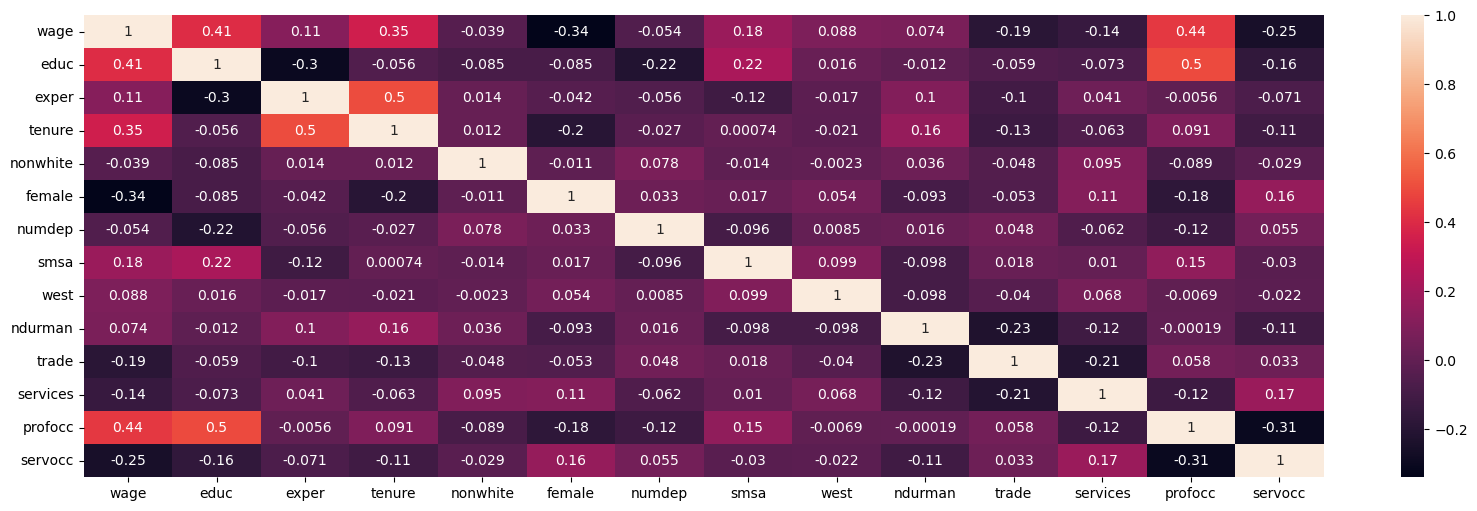

In [163]:
plt.figure(figsize = (20,6))
#cmap = sns.cm.rocket_r;cmap = cmap
sns.heatmap(corr,annot=True)

In [239]:
from sklearn import datasets, linear_model
import statsmodels.api as sm
from scipy import stats

X = wagesraw.iloc[:,1:]
y = wagesraw.wage

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     29.25
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           2.34e-64
Time:                        17:50:13   Log-Likelihood:                -2100.1
No. Observations:                 526   AIC:                             4236.
Df Residuals:                     508   BIC:                             4313.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        345.0631    105.457      3.272      0.0

eval_env: 1


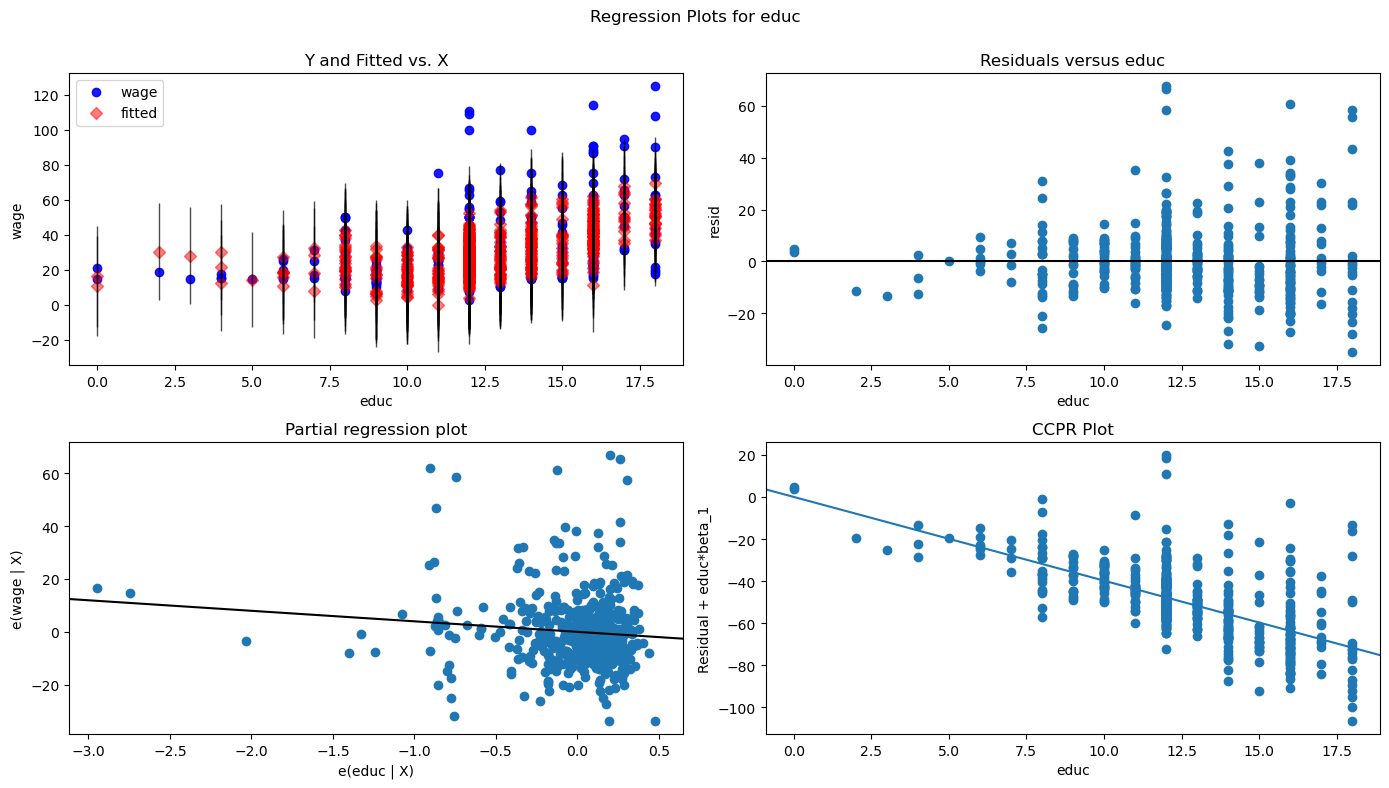

In [240]:
fig = plt.figure(figsize=(14, 8)) 
# creating regression plots
fig = sm.graphics.plot_regress_exog(est2, 'educ', fig=fig)

In [165]:
T = X.loc[:, X.columns!='exper']
X2 = sm.add_constant(T)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     35.72
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           4.39e-60
Time:                        16:44:53   Log-Likelihood:                -2119.9
No. Observations:                 526   AIC:                             4266.
Df Residuals:                     513   BIC:                             4321.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9977      3.587      1.393      0.1

In [166]:
T = X.loc[:, X.columns!='tenure']
X2 = sm.add_constant(T)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     30.96
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           2.68e-53
Time:                        16:44:53   Log-Likelihood:                -2136.3
No. Observations:                 526   AIC:                             4299.
Df Residuals:                     513   BIC:                             4354.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3452      4.207      0.320      0.7

In [167]:
T = X.loc[:, X.columns!='nonwhite']
X2 = sm.add_constant(T)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     36.16
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           1.07e-60
Time:                        16:44:53   Log-Likelihood:                -2118.4
No. Observations:                 526   AIC:                             4263.
Df Residuals:                     513   BIC:                             4318.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6248      4.051      0.401      0.6

In [168]:
T = X.loc[:, X.columns!='female']
X2 = sm.add_constant(T)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     29.68
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           2.16e-51
Time:                        16:44:53   Log-Likelihood:                -2141.0
No. Observations:                 526   AIC:                             4308.
Df Residuals:                     513   BIC:                             4363.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.9697      4.183     -0.710      0.4

In [169]:
T = X.loc[:, X.columns!='numdep']
X2 = sm.add_constant(T)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     35.58
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           6.68e-60
Time:                        16:44:53   Log-Likelihood:                -2120.3
No. Observations:                 526   AIC:                             4267.
Df Residuals:                     513   BIC:                             4322.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2727      3.858      1.108      0.2

In [170]:
T = X.loc[:, X.columns!='smsa']
X2 = sm.add_constant(T)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     35.02
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           4.04e-59
Time:                        16:44:53   Log-Likelihood:                -2122.2
No. Observations:                 526   AIC:                             4270.
Df Residuals:                     513   BIC:                             4326.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2007      4.058      0.789      0.4

In [171]:
T = X.loc[:, X.columns!='west']
X2 = sm.add_constant(T)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     35.07
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           3.46e-59
Time:                        16:44:54   Log-Likelihood:                -2122.1
No. Observations:                 526   AIC:                             4270.
Df Residuals:                     513   BIC:                             4326.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2130      4.090      0.541      0.5

In [172]:
T = X.loc[:, X.columns!='ndurman']
X2 = sm.add_constant(T)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     36.03
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           1.60e-60
Time:                        16:44:54   Log-Likelihood:                -2118.9
No. Observations:                 526   AIC:                             4264.
Df Residuals:                     513   BIC:                             4319.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2381      4.041      0.306      0.7

In [173]:
T = X.loc[:, X.columns!='trade']
X2 = sm.add_constant(T)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     31.97
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           8.94e-55
Time:                        16:44:54   Log-Likelihood:                -2132.8
No. Observations:                 526   AIC:                             4292.
Df Residuals:                     513   BIC:                             4347.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0286      4.032     -0.999      0.3

In [174]:
T = X.loc[:, X.columns!='services']
X2 = sm.add_constant(T)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     35.05
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           3.76e-59
Time:                        16:44:54   Log-Likelihood:                -2122.2
No. Observations:                 526   AIC:                             4270.
Df Residuals:                     513   BIC:                             4326.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6026      4.075      0.148      0.8

In [175]:
T = X.loc[:, X.columns!='profocc']
X2 = sm.add_constant(T)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     31.73
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           2.04e-54
Time:                        16:44:54   Log-Likelihood:                -2133.6
No. Observations:                 526   AIC:                             4293.
Df Residuals:                     513   BIC:                             4349.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.6603      4.015     -1.161      0.2

In [176]:
T = X.loc[:, X.columns!='servocc']
X2 = sm.add_constant(T)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     35.83
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           3.03e-60
Time:                        16:44:54   Log-Likelihood:                -2119.5
No. Observations:                 526   AIC:                             4265.
Df Residuals:                     513   BIC:                             4320.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0000      4.048      0.247      0.8

In [177]:
T = X.loc[:, X.columns!='numdep']
X2 = sm.add_constant(T)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())
#plot=pies.plot.pie(subplots=True,figsize=(20, 10))

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     35.58
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           6.68e-60
Time:                        16:44:54   Log-Likelihood:                -2120.3
No. Observations:                 526   AIC:                             4267.
Df Residuals:                     513   BIC:                             4322.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2727      3.858      1.108      0.2

In [178]:
wagesraw.sample(20)

,wage,educ,exper,tenure,nonwhite,female,numdep,smsa,west,ndurman,trade,services,profocc,servocc,nodep
522,11.350000,10,2,0,0,1,3,0,1,0,1,0,1,0,0
216,40.500002,12,38,3,0,1,1,1,0,0,0,0,1,0,0
431,22.500000,14,10,0,0,0,0,1,0,0,0,0,0,0,1
185,109.300003,12,24,16,0,0,3,1,0,0,1,0,1,0,0
109,49.000001,17,7,0,0,0,0,1,0,0,0,1,1,0,1
385,43.750000,12,4,4,0,0,0,1,0,0,0,0,0,0,1
425,15.000000,14,33,3,0,1,0,1,0,0,0,0,0,1,1
339,22.500000,12,13,0,0,0,0,1,0,0,1,0,0,0,1
420,31.750000,14,10,1,0,1,2,1,0,0,0,0,0,0,0
107,33.350000,12,35,10,0,0,0,1,0,0,0,0,0,0,1


<AxesSubplot:ylabel='Frequency'>

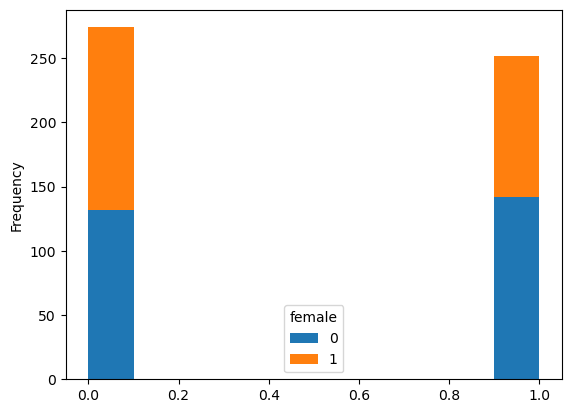

In [179]:
#wagesraw[['female','nodep']].hist(weights=df['nodep'] )
#wagesraw.hist('female',weights=wagesraw['nodep'] )
wagesraw.pivot(columns="female")["nodep"].plot(kind="hist", stacked=True)

<AxesSubplot:>

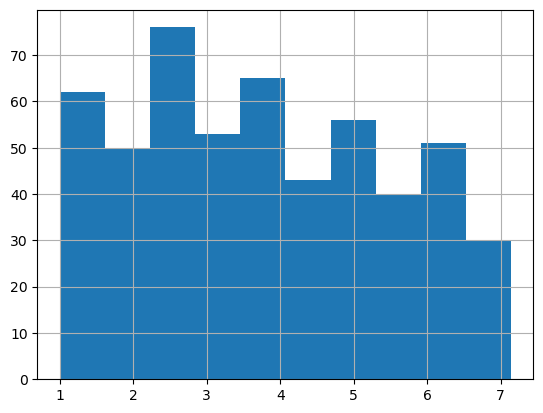

In [180]:
#df = pd.DataFrame(np.sqrt(wagesraw['exper']))
#df.hist(bins=20)
wagesraw['sqrtexp'].hist()

<AxesSubplot:>

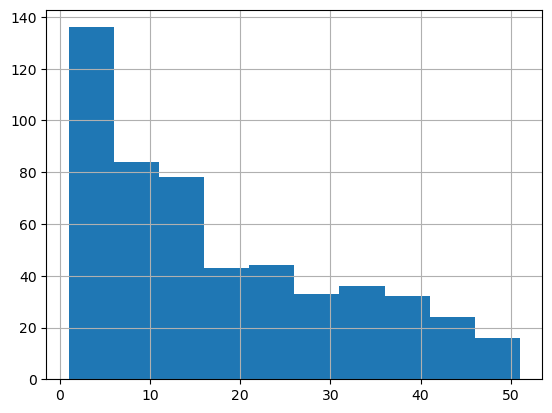

In [181]:
wagesraw['exper'].hist()

In [255]:
exclude=['exper','numdep','sqrtten','logeduc']
#wagesraw.loc[:, df.columns.difference(exclude)].hist() 
T = X.loc[:, X.columns.difference(exclude)]
X2 = sm.add_constant(T)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     34.28
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           2.41e-61
Time:                        18:32:39   Log-Likelihood:                -2114.9
No. Observations:                 526   AIC:                             4258.
Df Residuals:                     512   BIC:                             4318.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7947      4.133      0.192      0.8

In [250]:
X.head()

,educ,exper,tenure,nonwhite,female,numdep,smsa,west,ndurman,trade,services,profocc,servocc,nodep,sqrtexp,sqrtten,logeduc
0,11,2,0,0,1,2,1,1,0,0,0,0,0,0,1.414214,0.000000,2.944439
1,12,22,2,0,1,3,1,1,0,0,1,0,1,0,4.690416,1.414214,2.890372
2,11,2,0,0,0,2,0,1,0,1,0,0,0,0,1.414214,0.000000,2.944439
3,8,44,28,0,0,0,1,1,0,0,0,0,0,1,6.633250,5.291503,3.091042
4,12,7,2,0,0,1,0,1,0,0,0,0,0,0,2.645751,1.414214,2.890372


<AxesSubplot:xlabel='sqrtexp', ylabel='wage'>

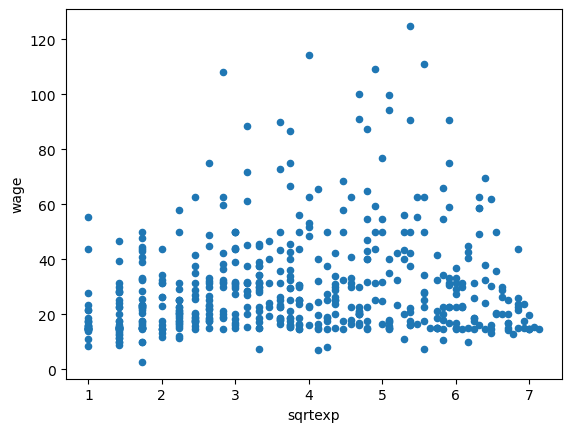

In [256]:
wagesraw.plot.scatter(x='sqrtexp', y='wage')

In [263]:
#exclude=[]
exclude=['nodep','sqrtexp','sqrtten','logeduc']
#wagesraw.loc[:, df.columns.difference(exclude)].hist() 
T = X.loc[:, X.columns.difference(exclude)]
X2 = sm.add_constant(T)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     33.32
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           6.48e-60
Time:                        21:22:23   Log-Likelihood:                -2118.4
No. Observations:                 526   AIC:                             4265.
Df Residuals:                     512   BIC:                             4325.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6882      4.070      0.415      0.6

eval_env: 1


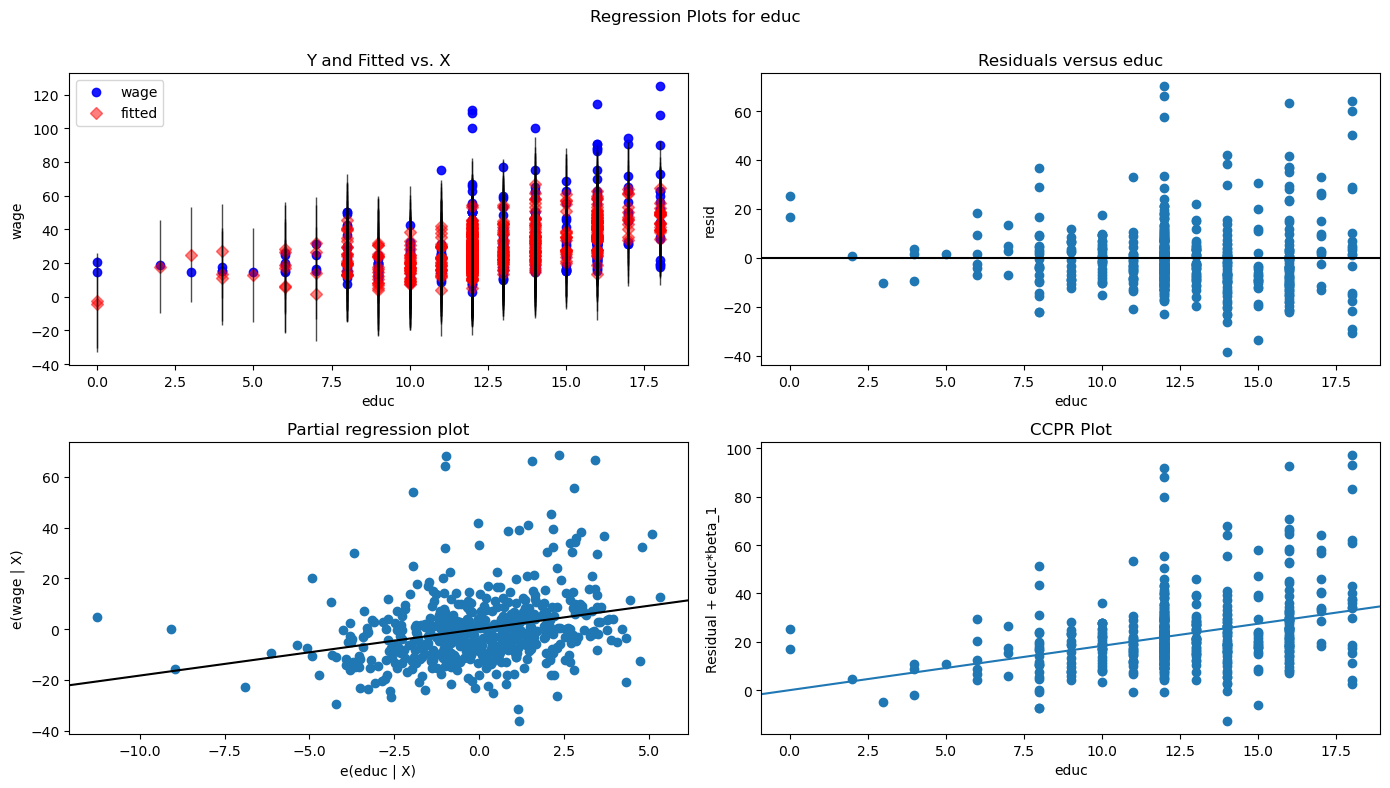

In [265]:
fig = plt.figure(figsize=(14, 8)) 
# creating regression plots
fig = sm.graphics.plot_regress_exog(est2, 'educ', fig=fig)